Importing The Libraries Needed

In [77]:
from easygui import fileopenbox
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import *

Reading the data

In [3]:
fileopenbox()

'C:\\Users\\parasaran\\Downloads\\admission.csv'

In [8]:
df=pd.read_csv('C:\\Users\\parasaran\\Downloads\\admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


checking the columns

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Converting the dependent to 0 ands 1

In [10]:
df['Chance of Admit ']=np.where(df['Chance of Admit ']>0.80,1,0)

In [11]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,0


In [12]:
df['Chance of Admit '].value_counts()/df.shape[0]*100

0    71.6
1    28.4
Name: Chance of Admit , dtype: float64

droping the 'Serial No' column 

In [13]:
df.drop('Serial No.',axis=1,inplace=True)

Checking for correlation 

In [14]:
c=df.corr()

<AxesSubplot:>

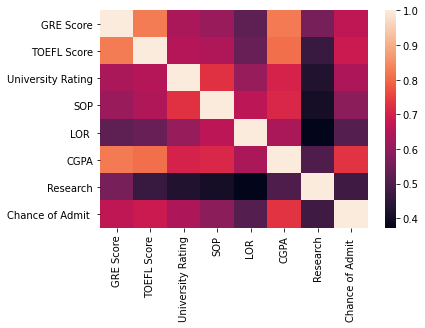

In [15]:
sns.heatmap(c)

Ploting the graph for identifying any relation betwwen them

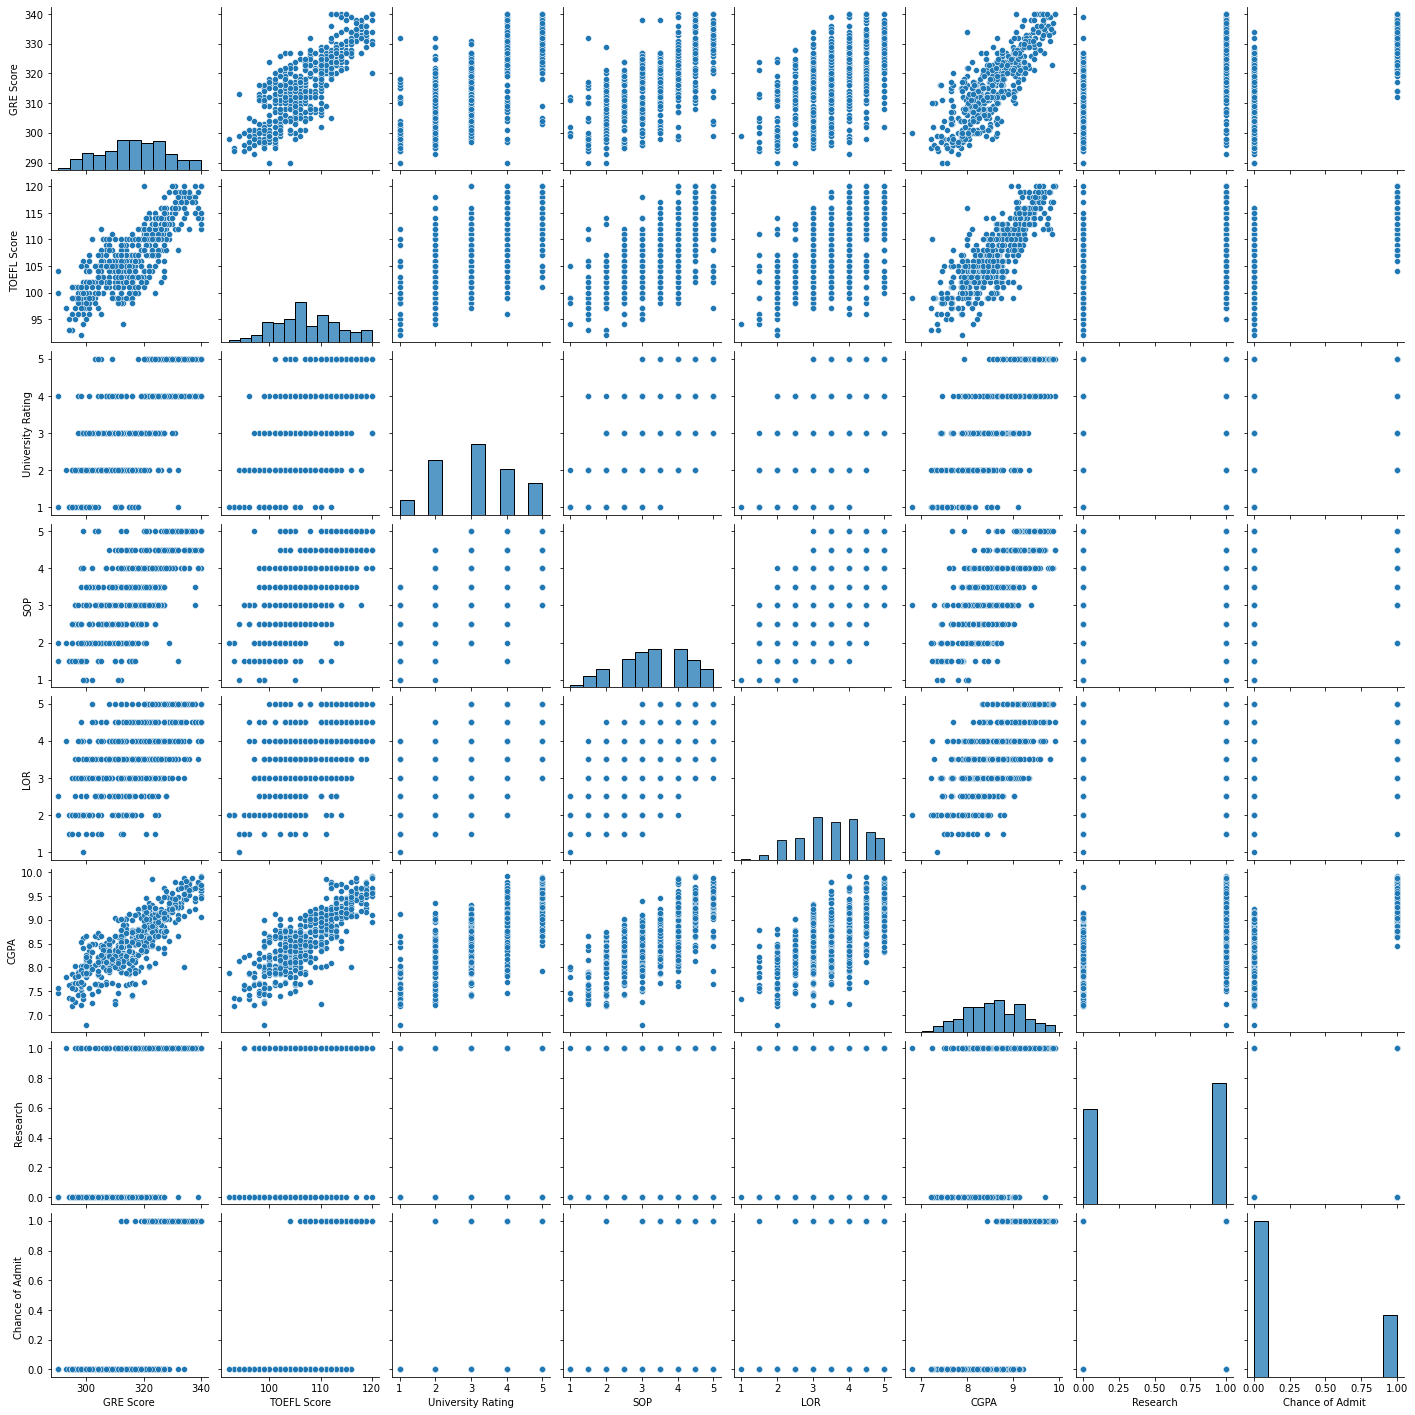

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


Checking for the null values

In [18]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Splitting the data into train and test 

In [19]:
X=df.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [20]:
y=df.iloc[:,-1]
y=pd.DataFrame(y)
y

,Chance of Admit
0,1
1,0
2,0
3,0
4,0
...,...
495,1
496,1
497,1
498,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

Running the train and test DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [24]:
dt=DecisionTreeClassifier()

In [25]:
kfold=KFold(random_state=66,n_splits=10)

In [26]:
param_grid={'max_features':['auto','sqrt','log'],'criterion':['gini','entropy']}

In [27]:
grid=GridSearchCV(estimator=dt,param_grid=param_grid,cv=kfold)

In [28]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=66, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log']})

In [29]:
grid.best_params_

{'criterion': 'gini', 'max_features': 'sqrt'}

In [32]:
trainscore=grid.score(X_train,y_train)
trainscore

1.0

In [33]:
testscore=grid.score(X_test,y_test)
testscore

0.94

Runing the train and test data in  RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [35]:
rf=RandomForestClassifier()

In [36]:
kfold=KFold(random_state=66,n_splits=10)

In [37]:
param_grid={'n_estimators':[30,40,50,100],'max_features':['auto','sqrt','log'],'criterion':['gini','entropy']}

In [38]:
grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=kfold)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=66, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log'],
                         'n_estimators': [30, 40, 50, 100]})

In [40]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

In [41]:
trainscore=grid.score(X_train,y_train)
trainscore

1.0

In [42]:
testscore=grid.score(X_test,y_test)
testscore

0.9266666666666666

Running the train and test data in BoostingTechnique

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [44]:
xgb=XGBClassifier()

In [45]:
param_grid={'n_estimators':[30,40,50,100],'learning_rate':[0.001]}

In [46]:
grid=GridSearchCV(estimator=xgb,param_grid=param_grid)

In [47]:
grid.fit(X_train,y_train)

[13:57:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [48]:
grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 40}

In [50]:
trainscore=grid.score(X_train,y_train)
trainscore

0.9514285714285714

In [51]:
testscore=grid.score(X_test,y_test)
testscore

0.9333333333333333

As to check the optimum parameters we used the gridsearch 

In [106]:
model=[]
model.append(('RF',RandomForestClassifier()))
model.append(('XGB',XGBClassifier(learning_rate=0.001,n_estimators=40)))
model.append(('DT',DecisionTreeClassifier()))

('RF', 0.9314285714285715, 0.03545621041711673)
[15:25:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set

Text(0.5, 0, "['RF', 'XGB', 'DT']")

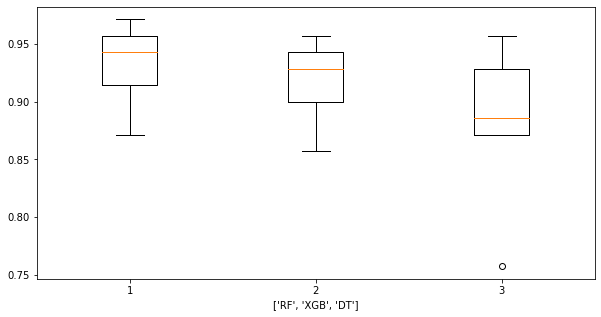

In [107]:
results=[]
names=[]
scoring='accuracy'
for name,models in model:
    kfold=KFold(n_splits=5,random_state=5)
    cv_results=cross_val_score(models,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    final_output=(name,cv_results.mean(),cv_results.std())
    print(final_output)


plt.figure(figsize=(10,5))
plt.boxplot(results)
plt.xlabel(names)

CONCLUSION:

(i) As for as concerned XGBclassifer gives the perfect accuracy score for the model